In [1]:
# Install
!pip install pandas matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create database + sales table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
data = [
    ("Laptop", 5, 60000),
    ("Laptop", 2, 62000),
    ("Phone", 10, 15000),
    ("Phone", 7, 15500),
    ("Headphones", 15, 2000),
    ("Headphones", 20, 1800),
    ("Tablet", 3, 30000),
    ("Tablet", 2, 32000),
    ("Smartwatch", 8, 7000),
    ("Smartwatch", 5, 7500)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

print("✅ sales_data.db created with advanced sample data!")


✅ sales_data.db created with advanced sample data!


In [2]:
# Reconnect
conn = sqlite3.connect("sales_data.db")

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(AVG(price),2) AS avg_price,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Pretty print
print("📊 Advanced Sales Summary:\n")
display(df.style.background_gradient(cmap="Blues"))


📊 Advanced Sales Summary:



In [3]:
# Top product by quantity
top_qty = df.loc[df['total_qty'].idxmax()]

# Top product by revenue
top_rev = df.loc[df['revenue'].idxmax()]

print(f"🔥 Top Selling Product (by Quantity): {top_qty['product']} ({top_qty['total_qty']} units)")
print(f"💰 Highest Revenue Product: {top_rev['product']} (₹{top_rev['revenue']})")


🔥 Top Selling Product (by Quantity): Headphones (35 units)
💰 Highest Revenue Product: Laptop (₹424000.0)


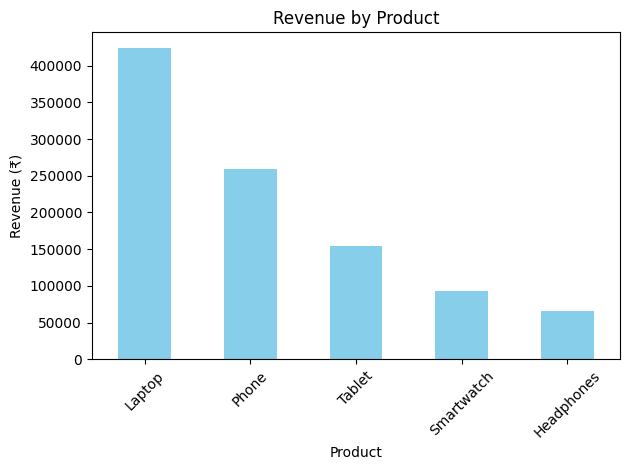

In [5]:
# Revenue Bar Chart
df.plot(kind='bar', x='product', y='revenue', color="skyblue", legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_chart.png")
plt.show()

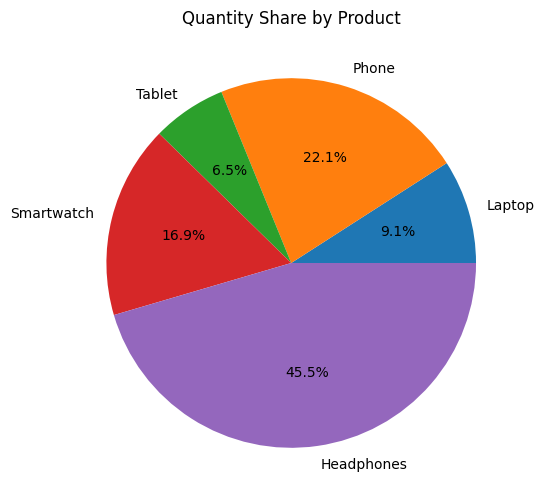

In [6]:
# Quantity Pie Chart
df.set_index("product")["total_qty"].plot(kind='pie', autopct="%1.1f%%", figsize=(6,6))
plt.title("Quantity Share by Product")
plt.ylabel("")
plt.savefig("quantity_pie.png")
plt.show()